In [1]:
cd("..")

In [2]:
import Pkg

Pkg.activate(".")

  Activating project at `~/Wordle`


In [3]:
import Wordle: play, candidate_pool
import Statistics: mean
import Printf: @printf
import ProgressMeter: @showprogress
import Plots: histogram

In [4]:
function print_stats(weights, step_counts)
    @printf("Weights = %s\n", weights)
    @printf("Mean Step Counts = %f\n", mean(step_counts))
    for i in 1:10
        @printf("P(Step Counts <= %d) = %f\n", i, mean(step_counts .<= i))
    end
end

print_stats (generic function with 1 method)

In [5]:
const ALL_WORDS = candidate_pool(true)

2315-element Vector{Wordle.Candidate}:
 Wordle.Candidate(('c', 'i', 'g', 'a', 'r'))
 Wordle.Candidate(('r', 'e', 'b', 'u', 't'))
 Wordle.Candidate(('s', 'i', 's', 's', 'y'))
 Wordle.Candidate(('h', 'u', 'm', 'p', 'h'))
 Wordle.Candidate(('a', 'w', 'a', 'k', 'e'))
 Wordle.Candidate(('b', 'l', 'u', 's', 'h'))
 Wordle.Candidate(('f', 'o', 'c', 'a', 'l'))
 Wordle.Candidate(('e', 'v', 'a', 'd', 'e'))
 Wordle.Candidate(('n', 'a', 'v', 'a', 'l'))
 Wordle.Candidate(('s', 'e', 'r', 'v', 'e'))
 Wordle.Candidate(('h', 'e', 'a', 't', 'h'))
 Wordle.Candidate(('d', 'w', 'a', 'r', 'f'))
 Wordle.Candidate(('m', 'o', 'd', 'e', 'l'))
 ⋮
 Wordle.Candidate(('e', 'j', 'e', 'c', 't'))
 Wordle.Candidate(('r', 'o', 'g', 'e', 'r'))
 Wordle.Candidate(('r', 'i', 'v', 'a', 'l'))
 Wordle.Candidate(('u', 'n', 't', 'i', 'e'))
 Wordle.Candidate(('r', 'e', 'f', 'i', 't'))
 Wordle.Candidate(('a', 'o', 'r', 't', 'a'))
 Wordle.Candidate(('a', 'd', 'u', 'l', 't'))
 Wordle.Candidate(('j', 'u', 'd', 'g', 'e'))
 Wordle.Candi

In [6]:
const ALL_WEIGHTS = (
    [1 / 3, 1 / 3, 1 / 3],
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
)

([0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0])

In [7]:
step_counts = fill(0, length(ALL_WORDS), length(ALL_WEIGHTS))

for (j, weights) in enumerate(ALL_WEIGHTS)
    @showprogress for (i, word) in enumerate(ALL_WORDS)
        steps = play(String(word), weights = weights)
        step_counts[i, j] = steps
    end

    print_stats(weights, step_counts[:, j])
    println()
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


Weights = [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Mean Step Counts = 3.796976
P(Step Counts <= 1) = 0.000432
P(Step Counts <= 2) = 0.053564
P(Step Counts <= 3) = 0.416415
P(Step Counts <= 4) = 0.800864
P(Step Counts <= 5) = 0.947300
P(Step Counts <= 6) = 0.987041
P(Step Counts <= 7) = 0.997840
P(Step Counts <= 8) = 0.999568
P(Step Counts <= 9) = 1.000000
P(Step Counts <= 10) = 1.000000

Weights = [1.0, 0.0, 0.0]
Mean Step Counts = 3.861771
P(Step Counts <= 1) = 0.000432
P(Step Counts <= 2) = 0.048812
P(Step Counts <= 3) = 0.388769
P(Step Counts <= 4) = 0.784017
P(Step Counts <= 5) = 0.942117
P(Step Counts <= 6) = 0.980562
P(Step Counts <= 7) = 0.994816
P(Step Counts <= 8) = 0.999136
P(Step Counts <= 9) = 0.999568
P(Step Counts <= 10) = 1.000000

Weights = [0.0, 1.0, 0.0]
Mean Step Counts = 3.820734
P(Step Counts <= 1) = 0.000432
P(Step Counts <= 2) = 0.053132
P(Step Counts <= 3) = 0.409071
P(Step Counts <= 4) = 0.796544
P(Step Counts <= 5) = 0.941685
P(Step Counts 

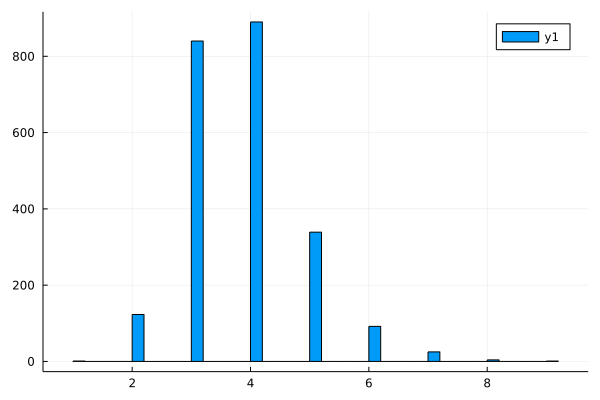

In [8]:
histogram(step_counts[:, 1])

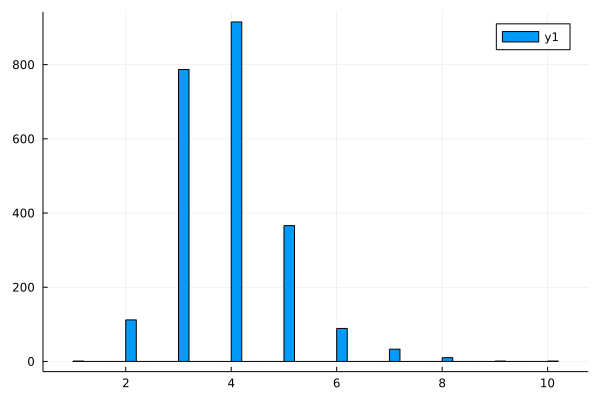

In [9]:
histogram(step_counts[:, 2])

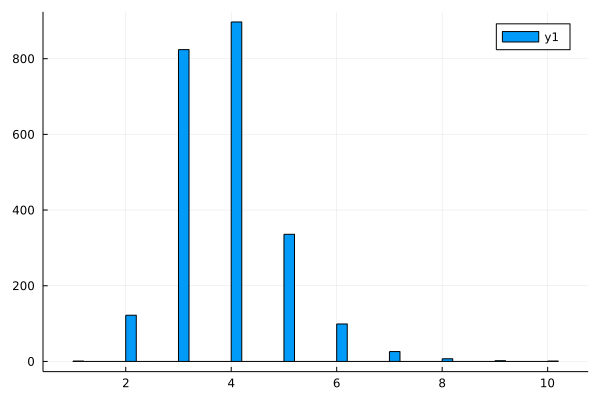

In [10]:
histogram(step_counts[:, 3])

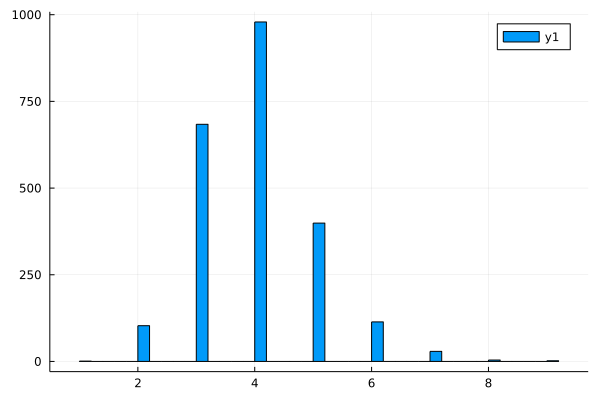

In [11]:
histogram(step_counts[:, 4])